In [2]:
import pandas as pd
import numpy as np 
import scipy.io
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import BernoulliRBM

In [4]:
df_HPC = pd.read_csv('data/HPC1.csv', names = ['HPC'])
df_PFC = pd.read_csv('data/PFC1.csv', names = ['PFC'])
df_EMG = pd.read_csv('data/EMG1.csv', names = ['EMG'])

df = pd.concat([df_HPC, df_PFC,df_EMG], axis=1)
df.head()

,HPC,PFC,EMG
0,-5.836571,9.003894,0.506779
1,59.422057,77.620067,0.506780
2,-42.925064,-45.459779,0.506785
3,49.265049,115.321417,0.506792
4,70.679527,80.468220,0.506802


In [5]:
df_test = df[:2500]

In [ ]:
from vizualization.vzu import visualise 

In [7]:
X = StandardScaler().fit_transform(df_test)

In [8]:
model = BernoulliRBM(n_components=2)
model.fit_transform(X)

array([[1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00],
       ...,
       [1.45147304e-11, 1.45216450e-11],
       [2.97793319e-11, 2.93431674e-11],
       [1.81314948e-15, 1.84845455e-15]], shape=(2500, 2))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1.91, time = 0.05s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1.91, time = 0.05s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1.91, time = 0.04s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1.92, time = 0.02s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1.91, time = 0.03s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1.90, time = 0.03s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1.91, time = 0.03s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1.92, time = 0.03s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1.91, time = 0.03s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1.91, time = 0.03s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1.91, time = 0.03s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1.91, time = 0.03s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1.92, time = 0.05s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1.91, time = 0.07s
[BernoulliRBM] Iteration 15, pseudo-likelih

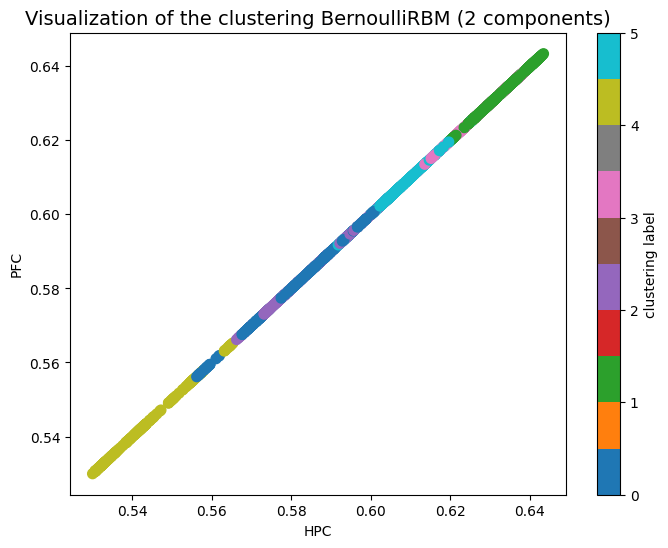

In [9]:
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. PRÉTRAITEMENT INDISPENSABLE
# BernoulliRBM a besoin de données entre 0 et 1.
# On remplace StandardScaler par MinMaxScaler.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_test) 

# 2. DÉFINITION DU MODÈLE RBM
# J'ai ajouté n_iter et learning_rate pour donner au modèle une chance d'apprendre
# n_components=2 permet de réduire directement en 2D pour le graphique
rbm = BernoulliRBM(n_components=2, 
                   learning_rate=0.06, 
                   n_iter=20, 
                   random_state=42, 
                   verbose=True)

# 3. TRANSFORMATION
X_rbm = rbm.fit_transform(X_scaled)

# 4. GÉNÉRATION D'ÉTIQUETTES (pour la couleur)
# Comme le RBM est non-supervisé, il nous faut des groupes pour colorer les points.
# On peut utiliser K-Means sur les données originales pour voir comment le RBM les sépare.
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 5. VISUALISATION
# Appel de votre fonction définie précédemment
visualise(X_rbm, labels, "BernoulliRBM (2 components)")

In [10]:
len(np.unique(labels))

6

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1.91, time = 0.08s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1.91, time = 0.07s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1.91, time = 0.06s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1.91, time = 0.07s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1.92, time = 0.08s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1.91, time = 0.06s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1.91, time = 0.06s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1.92, time = 0.06s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1.92, time = 0.06s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1.91, time = 0.06s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1.92, time = 0.10s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1.92, time = 0.07s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1.92, time = 0.06s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1.92, time = 0.06s
[BernoulliRBM] Iteration 15, pseudo-likelih

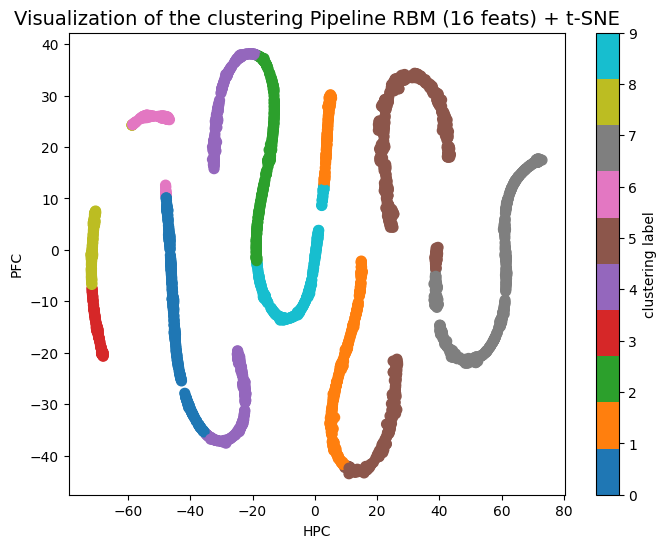

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# 1. Préparation (MinMax est obligatoire pour RBM)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_test)

# 2. RBM : On augmente n_components pour capturer la complexité
# On passe de 2 à 16 composants (ou plus)
rbm = BernoulliRBM(n_components=16, 
                   learning_rate=0.01, 
                   n_iter=20, 
                   random_state=42,
                   verbose=True)

# On transforme les données : X_features aura 16 colonnes
X_features = rbm.fit_transform(X_scaled)

# 3. t-SNE : C'est lui qui va faire la réduction 2D pour nos yeux
# Il va travailler sur les caractéristiques "nettoyées" par la RBM
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X_features)

# 4. Clustering pour la couleur (si vous n'avez pas de labels)
# On clusterise sur les features RBM, c'est souvent plus propre
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_features)

# 5. Visualisation
visualise(X_embedded, labels, "Pipeline RBM (16 feats) + t-SNE")